<a href="https://colab.research.google.com/github/KalikaKay/Thinkful-Notebooks/blob/main/Capstone_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####head

In [ ]:
#Setup access to Google CSV files
import gspread 
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Setup dataframe and visualizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

#setup for dark theme
plt.style.use(['dark_background'])

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())


wksPath = "https://docs.google.com/spreadsheets/d/1C3wS-dpUQUWOztEDZLWCttnMjgmqOyzEkQ8XqVpdqzU"
wks = gc.open_by_url(wksPath).sheet1
df = pd.DataFrame.from_records(wks.get_all_records())
df.describe().T

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [ ]:
from scipy import stats
import math

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

def printDiag(col):
  #This is new stuff that I'm looking at. Okay, so I need to take a look at two fields as they relate to attrition. So I want to separate the dataframe.
  stay = df.iloc[(df["Attrition"] == 'No').values][[col]]
  separate = df.iloc[(df["Attrition"] == 'Yes').values][[col]]

  #T=Test Variable and histograms
  #Description of the two distributions
  print("Stay:", stats.describe(stay[col]))
  print("Separate:", stats.describe(separate[col]))

  #What about the p value?
  print(stats.ttest_ind(stay[col], separate[col]))
  print("Assuming the distribution is normal: ", get_95_ci(stay[col], separate[col]))

  plt.hist(stay[col], alpha = .5, color="red")
  plt.hist(separate[col], alpha = .5, color="pink")
  plt.show()

##IBM HR Analytics Employee Attrition
*A Thinkful Capstone One project*

>*by Kalika Kay Curry*

This is an analysis of [IBM's employee attrition](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset), which is an evaluation of the ability to retain quality employees. The organization has a 16% attrition rate. This value exceeds the amount of attrition for most successful businesses by 6%.

The dataset contains demographic, economic, and survey information about their employees. We will be taking a look at a few key factors from the data and see how they relate to attrition.

Based on our findings, there will be a recommendation to reduce the attrition. 

In [ ]:
s = df[['PercentSalaryHike', 'TrainingTimesLastYear','PercentSalaryHike', 'MonthlyIncome', 'Attrition', 'Education']]
s.groupby(by='Attrition').describe()

PercentSalaryHike                             ... Education               
                      count       mean       std   min  ...       25%  50%  75%  max
Attrition                                               ...                         
No                   1233.0  15.231144  3.639511  11.0  ...       2.0  3.0  4.0  5.0
Yes                   237.0  15.097046  3.770294  11.0  ...       2.0  3.0  4.0  5.0

[2 rows x 40 columns]

#IBM Attrition Hypothesis Analysis

Employees that are educated and that train more often will be more likely to leave the company if they are paid less with respect to employees that aren't/don't.

#Education and Training 

If education and training both impact the attrition; I would expect that the two would show some correlation.

*Does the education level of the employee relate to the amount of training that they're taking?*


Correlation: -0.02510024113793358


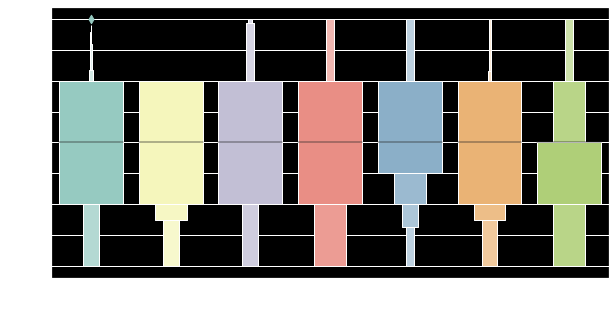

In [ ]:
print("Correlation:", df['TrainingTimesLastYear'].corr(df['Education']))
plt.figure(figsize=(10,5))
ax = sns.boxenplot(x="TrainingTimesLastYear", y="Education", data=df)

I ran a test for correlation and according to Pearson's coefficient, a highly educated employee is no more or less likely to engage in training. 

Likewise; a highly trained employee is no more or less likely to get an education. 

**Hypothesis Result**

$H = $ People who are more educated train more often. 

$H_{0} = $ There is no relationship between the education level and times trained last year.

At an absolute value of 0.025, the Pearson coefficient is so close to zero that I cannot override the null hypothesis that there is no relationship between the amount of training and the amount of education.

*Do educated employees get paid more or less at this company, monthly?*


Correllation: 0.09496067704188886


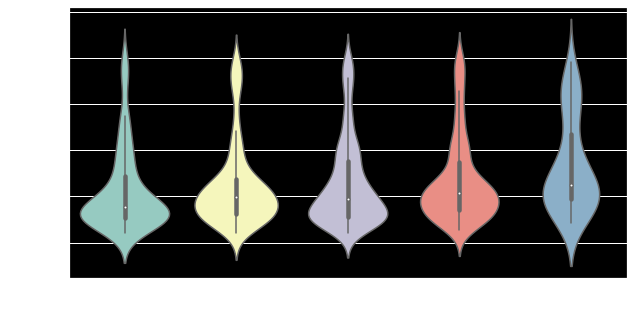

In [ ]:
print("Correllation:", df['MonthlyIncome'].corr(df['Education']))

plt.figure(figsize=(10,5))
ax = sns.violinplot(x="Education", y="MonthlyIncome", data=df)
plt.show()

I ran a test for correlation and according to Pearson's coefficient, a higher level of education has no impact on monthly income at this organization.

**Hypothesis Result**

$H = $ People who have a higher education level have a higher monthly income. 

$H_{0} = $ There is no relationship between the education level and their monthly income.

At an absolute value of 0.09, the Pearson coefficient is so close to zero that I cannot reject the null hypthosis. There is no relationship between an employee's monthly income and their education level. 

*Do employees who train more often earn more?*

Correlation: -0.02173627682389327


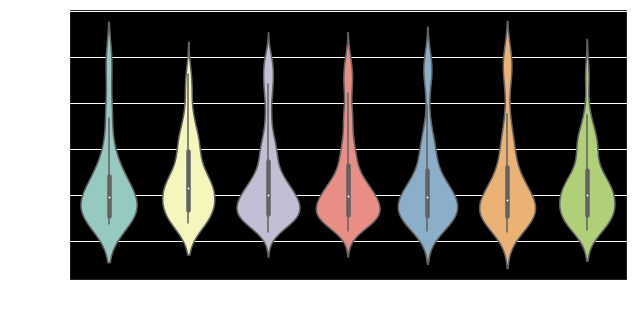

In [ ]:
print("Correlation:", df['MonthlyIncome'].corr(df['TrainingTimesLastYear']))
plt.figure(figsize=(10,5))
ax = sns.violinplot(x="TrainingTimesLastYear", y="MonthlyIncome", data=df)
plt.show()

I ran a test for correlation and according to Pearson's coefficient, the amount of training has no impact on the amount of income at this organization.

**Hypothesis Result**

$H = $ People who train more, annually, have a higher monthly income. 

$H_{0} = $ There is no relationship between the employee's annual training amount and employee monthly income.

At an absolute value of 0.02, the Pearson coefficient is so close to zero that I state that $H_{0}$ is true. There is no relationship between an employee's monthly income and the amount of training.

#What Have We Learned?
*Education and Training*

An employee's education and training don't have an impact on monthly income at this organization. 

These findings negate the following aspects of my hypothesis.

Attrition is by employees that are:
1.   Paid less and train more *than those that don't train as often.*
2.   Paid less and are higher educated *than those that aren't as educated*

It also negates the idea that those who are educated, train more.

**Hypothesis:**

Employees that are educated and that train more often will be more likely to leave the company if they are paid less with respect to employees that aren't/don't.

Part One Result: *There is no relation between being educated, monthly income, and training*

#Attrition
Remaining Hypothesis: 

**Employees that are more educated will be more likely to leave the company. Employees that train more will be more likely to leave the company. Employees that earn less will be more likely to leave the company.**

Review both attrition values on their monthly income, training, and education in order to complete the analysis for this hypothesis. 

Does Monthly Income impact the attrition?


Stay: DescribeResult(nobs=1233, minmax=(1051, 19999), mean=6832.739659367397, variance=23215128.338823583, skewness=1.2846660875596987, kurtosis=0.664057751851538)
Separate: DescribeResult(nobs=237, minmax=(1009, 19859), mean=4787.0928270042195, variance=13251131.516770363, skewness=1.908966310070742, kurtosis=4.068929804278029)
Ttest_indResult(statistic=6.203935765608938, pvalue=7.14736398535381e-10)
Assuming the distribution is normal:  The difference in means at the 95% confidence interval (two-tail) is between -2581.48413817964 and -1509.809526546714.


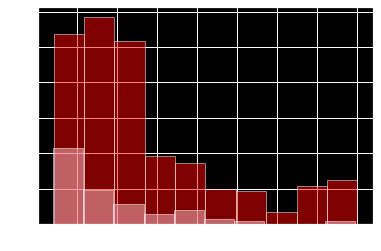

In [ ]:
printDiag('MonthlyIncome')

The kurtosis is too high on these results. I will accept the null hypothesis and ascertain that there is not a significant diffference in monthly income between employees that stay and leave.

**Hypothesis**

$H=$  People who earn less are more likely to leave the company.

$H_{0}=$  There is no significant difference in monthly income between employees that stay and employees that leave.

With a kurtosis of 4.0, the data does not fall within the means of normality. I accept the null hypothesis that there is no relationship between employee monthly income and attrition. 

*Do education levels have an impact on attrition?*


Stay: DescribeResult(nobs=1233, minmax=(1, 5), mean=2.927007299270073, variance=1.054732676083041, skewness=-0.2855924930065903, kurtosis=-0.5630979644679606)
Separate: DescribeResult(nobs=237, minmax=(1, 5), mean=2.839662447257384, variance=1.0165558177787315, skewness=-0.32159499449978696, kurtosis=-0.5661793799203254)
Ttest_indResult(statistic=1.202625515508589, pvalue=0.2293152033223043)
Assuming the distribution is normal:  The difference in means at the 95% confidence interval (two-tail) is between -0.22792871143514373 and 0.05323900740976631.


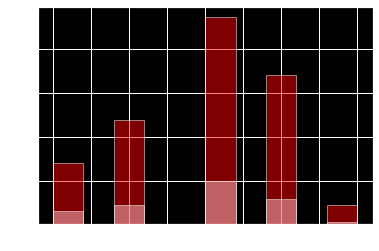

In [ ]:
printDiag('Education')

There is no real difference between education level when it comes to attrition.

**Hypothesis**

$H=$  People with higher education levels are more likely to leave the company.

$H_{0}=$  There is no significant difference in education levels between employees that stay and employees that leave.

The data does fall within the range of normality. The tTest statistic 1.22 is too low and probability of 23% is too high to reject the null hypothesis that there is no significant difference in education levels between those employees that stay or leave. 

Stay: DescribeResult(nobs=1233, minmax=(0, 6), mean=2.8329278183292783, variance=1.6733629306622007, skewness=0.5893457796652429, kurtosis=0.4406020934601762)
Separate: DescribeResult(nobs=237, minmax=(0, 6), mean=2.6244725738396624, variance=1.5744833011513981, skewness=0.3356451034337823, kurtosis=0.6192099574838474)
Ttest_indResult(statistic=2.2829029923666897, pvalue=0.02257849973720126)
Assuming the distribution is normal:  The difference in means at the 95% confidence interval (two-tail) is between -0.3837688576753809 and -0.033141631303851005.


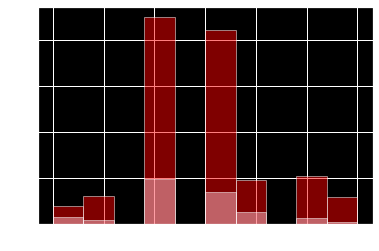

In [ ]:
printDiag('TrainingTimesLastYear')

Employees that stay with the company train one time more often than those that don't, annually. That is; employees that train three times or more a year, are more likely to stay with the company. 

**Hypothesis**

$H=$  People with who train more often are more likely to leave the company.

$H_{0}=$  There is no significant difference in the number of annual traning times between employees that stay and employees that leave.

The data does fall within the range of normality. The tTest statistic of 2.2 is high enough to accept the result and the probability of 2.2% places these results within the 95% confidence interval levels. 

There is a .022 probability that the results returned with respect to the null hypothesis were done by random chance. I reject both the null hypothesis and  original hypothesis.

When it comes to attrition, there is a significant difference between the annual training count. The confidence interval returns values that are slightly greater than zero. Since annual training is a single instance in time, I must evaluate to the nearest whole number, which is one. 

#Conclusion

IBM has a high attrition rate. I examined their attrition data to determine whether employees that are educated and that train more often are more likely to leave the company if they are paid less with respect to employees that aren't/don't.

IBM is more likely to retain employees that train three times a year. 

I recommend that IBM hire people who have been undergoing training this year, with an expectation of new hire training and a second training date to ensure retention.